# Trabajo Práctico 3: Sensor

### Objetivos:

+ Tomar una foto con el celular del patrón de barras generado y obtener el MTF.

Primero importamos las librerías correspondientes para procesar y analizar las imágenes

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Onda cuadrada 
Generamos la onda cuadrada para luego poder generar el patrón

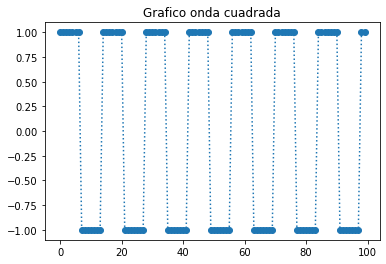

In [2]:
def generar_onda_cuadrada(largo, periodo):
    onda_cuadrada=np.zeros(largo)
    
    for i in range (0,largo):
        if np.mod(i,periodo)<periodo/2:

            onda_cuadrada[i]=1

        if np.mod(i,periodo)>=periodo/2:

            onda_cuadrada[i]=-1

    return onda_cuadrada

plt.title("Grafico onda cuadrada")
plt.plot(generar_onda_cuadrada(largo=100, periodo=14), ':o')

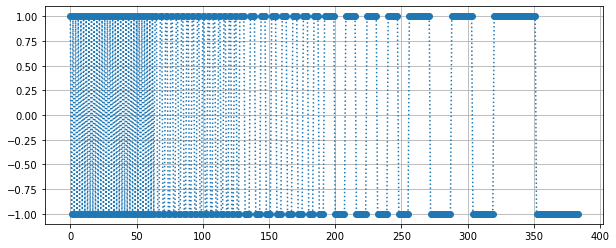

In [3]:
n_rep = 8
largo_max = 10
ys = []

anchos = [2, 4, 8, 16, 32, 64]
repeticiones = [32, 16, 8, 4, 2, 1]

for a, r in zip(anchos, repeticiones):
    ys.append(generar_onda_cuadrada(a*r, a))

y = np.hstack(ys)
n_samples = len(y)

t = np.linspace(0, n_samples, n_samples)

n_show = n_samples//10
plt.figure(figsize=(10,4))
plt.grid()

plt.plot(y, ':o')

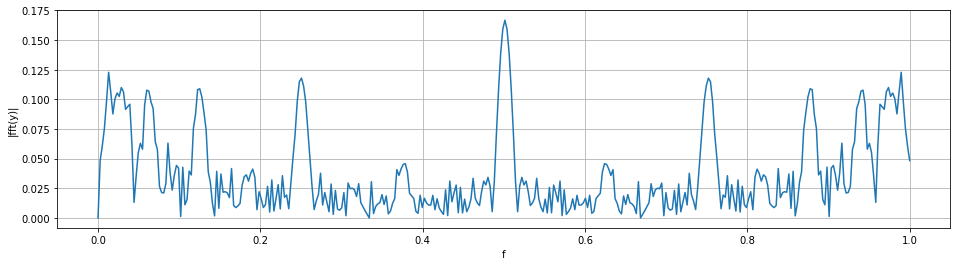

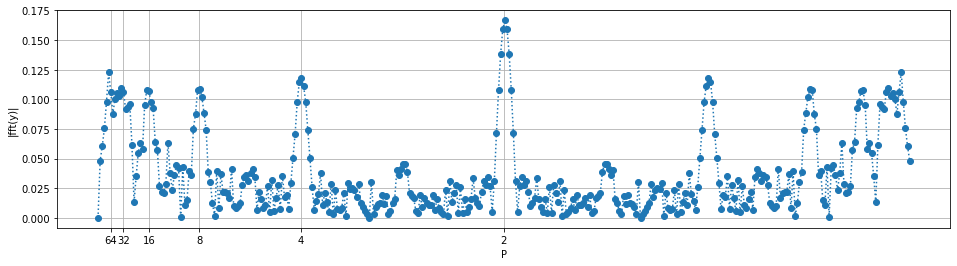

In [4]:
y_f = np.fft.fft(y)

ancho_pantalla = 1920
f = np.linspace(0, 1, n_samples)

plt.figure(figsize=(16,4))
plt.grid()

plt.ylabel('|fft(y)|')
plt.plot(f, np.abs(y_f)/n_samples)
plt.xlabel('f');

x = [1/(a) for a in anchos]
labels = [a for a in anchos]
plt.figure(figsize=(16,4))
plt.ylabel('|fft(y)|')
plt.grid()
n_show = n_samples
plt.plot(f[:n_show], np.abs(y_f[:n_show])/n_samples , ':o')
plt.xticks(x, labels);
plt.xlabel('P');

## Patrón MTF

Generamos el patrón MTF y guardamos la imagen obtenida

True

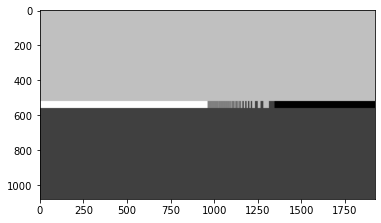

In [5]:
# Resolucion pantalla Full HD (1080p)
ancho_pantalla = 1920
alto_pantalla = 1080

alto_franja_central_px = 40

oscuro = 64
claro = 192

medio = (claro+oscuro)/2
amplitud = (claro-oscuro)/2

onda = medio + amplitud*y

centro_izq = 255*np.ones((alto_franja_central_px, ancho_pantalla//2))
centro_der =   0*np.ones((alto_franja_central_px, ancho_pantalla//2 - len(onda)))

arriba = claro*np.ones((alto_pantalla//2 - alto_franja_central_px//2, ancho_pantalla))
centro = np.hstack((centro_izq, np.tile(onda, (alto_franja_central_px, 1)), centro_der))
abajo = oscuro*np.ones((alto_pantalla//2 - alto_franja_central_px//2, ancho_pantalla))

patron_mtf = np.vstack((arriba, centro, abajo)).astype(np.uint8)

patron_mtf = cv2.cvtColor(patron_mtf, cv2.COLOR_GRAY2RGB)

plt.imshow(patron_mtf)
cv2.imwrite('patron_mtf.png', patron_mtf)

![title](patron_mtf.png)

## Foto del patrón MTF

A partir de la imagen generada, sacamos una foto de la misma para luego poder realizar el analisis del patrón MTF.

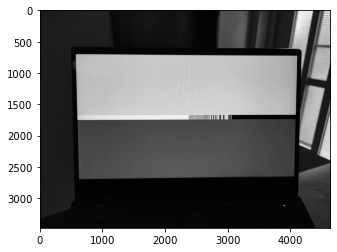

In [6]:
mtf_leer = cv2.imread('./mtf.jpg')

# Cargamos la imagen en escala de grises
mtf_leido_gray = cv2.cvtColor(mtf_leer, cv2.COLOR_BGR2GRAY)

plt.imshow(mtf_leido_gray, cmap='gray')

Dibujamos una linea roja sobre la imagen en la seccion del patron

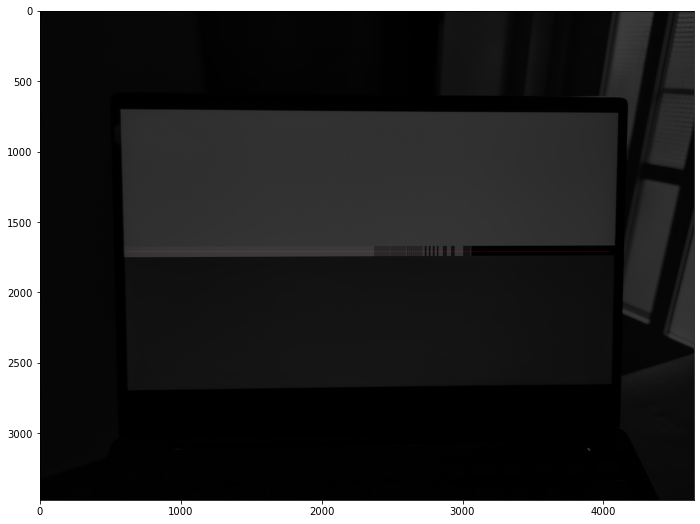

In [7]:
ajustar_linea_mtf = cv2.cvtColor(mtf_leido_gray//4, cv2.COLOR_GRAY2RGB)

ancho_foto = mtf_leido_gray.shape[1]

fila_mtf = 1710
zoom = 1600

columnas_mtf = slice(600,4050)

ajustar_linea_mtf[fila_mtf, columnas_mtf, 0] = 255

plt.figure(figsize=(16,9));
plt.imshow(ajustar_linea_mtf)

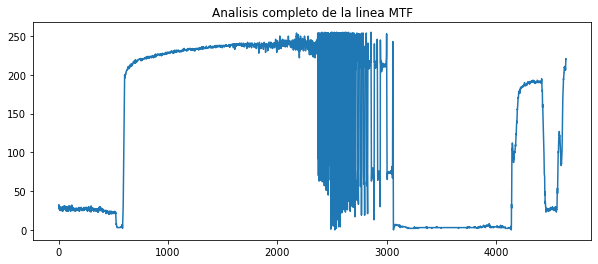

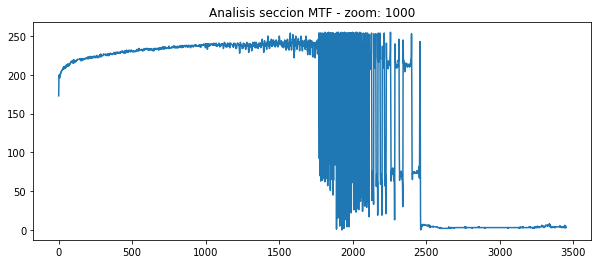

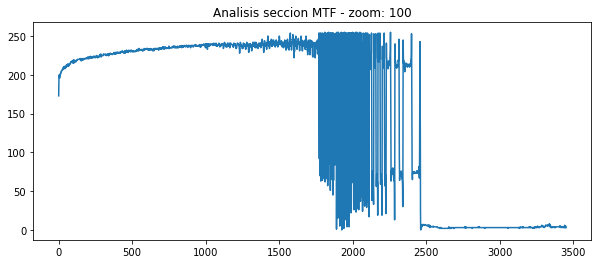

In [8]:
#Graficos intensidad vs pixel

plt.figure(figsize=(10,4))
plt.title("Analisis completo de la linea MTF")
plt.plot(mtf_leido_gray[fila_mtf,:])


zoom = 1000
plt.figure(figsize=(10,4))
plt.title("Analisis seccion MTF - zoom: 1000")
plt.plot(mtf_leido_gray[fila_mtf, columnas_mtf])


zoom = 100
plt.figure(figsize=(10,4))
plt.title("Analisis seccion MTF - zoom: 100")
plt.plot(mtf_leido_gray[fila_mtf, columnas_mtf])

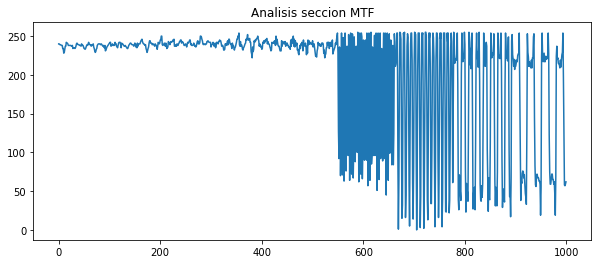

In [9]:
# Refinamos el corte y dibujamos con más detalle

zoom = 1000
fila_mtf = 1710

columnas_mtf = slice((ancho_foto//2-zoom//2), (ancho_foto//2+zoom//2))

y_est = mtf_leido_gray[fila_mtf, columnas_mtf]

plt.figure(figsize=(10,4))
plt.title("Analisis seccion MTF")
plt.plot(y_est)

<IPython.core.display.Javascript object>


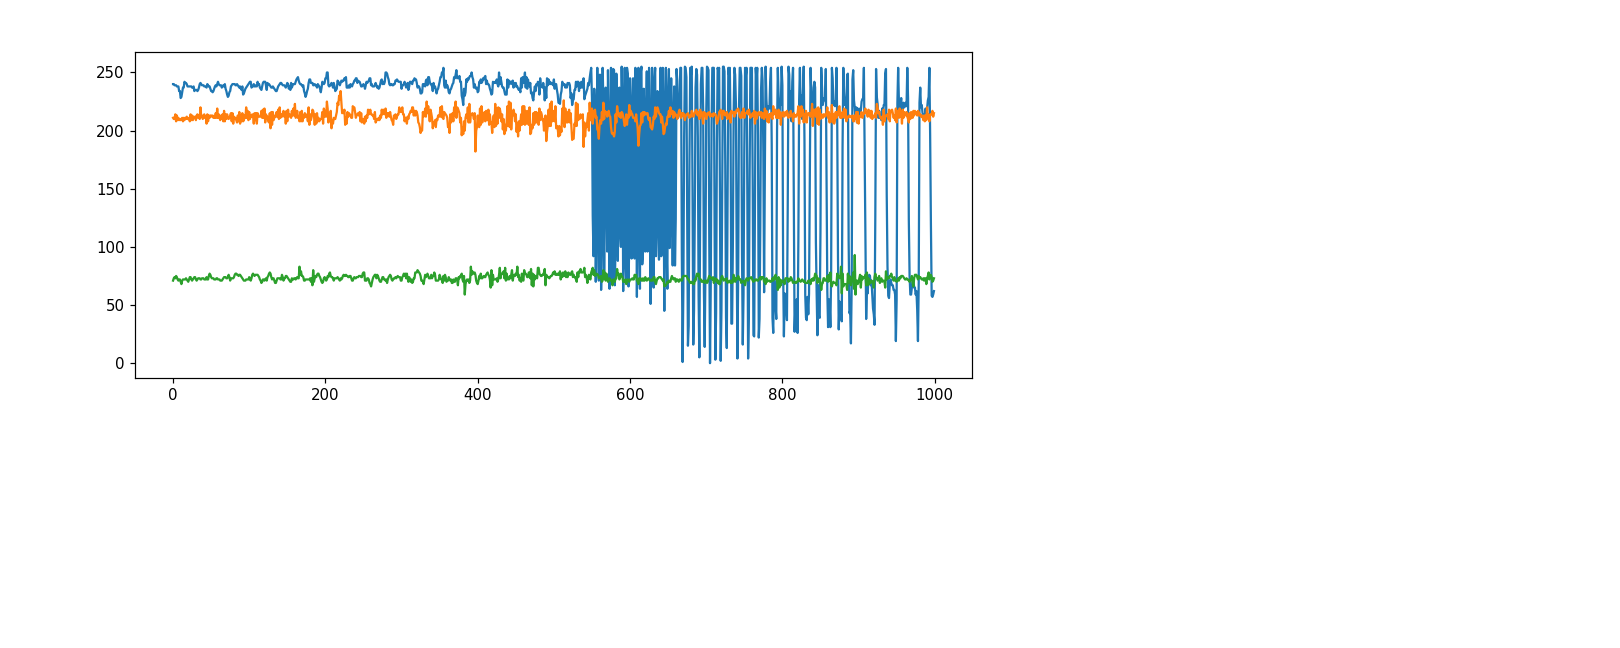

In [10]:
# Generamos un gráfico para leer donde cortar para recuperar la estimación
# Para que quede centrado utilizamos los valores +/- 50

claro_est = mtf_leido_gray[fila_mtf-50, columnas_mtf]
oscuro_est = mtf_leido_gray[fila_mtf+50, columnas_mtf]

#Permite medir en la foto
%matplotlib notebook 

plt.figure(figsize=(10,4))
plt.plot(y_est)
plt.plot(claro_est)
plt.plot(oscuro_est)

<IPython.core.display.Javascript object>


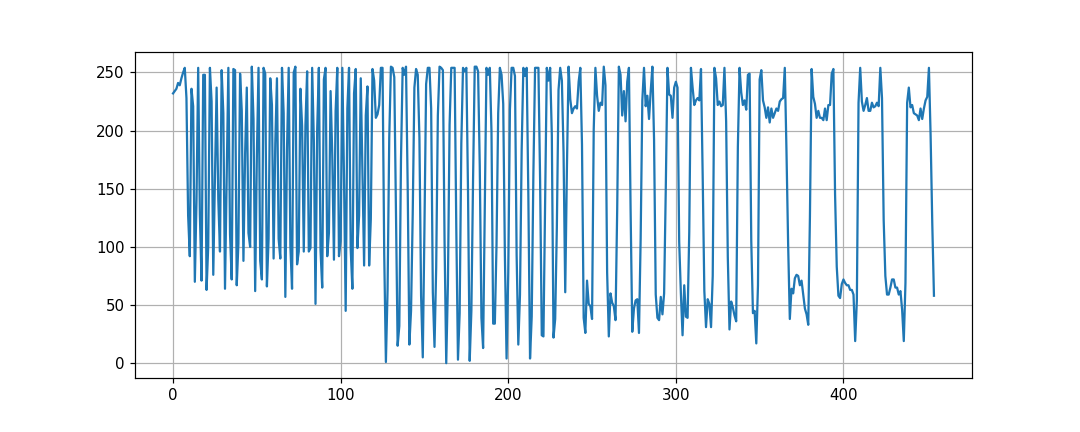

In [11]:
# Observando el grafico anterior, tomamos las medidas de inicio y final
k_start = 542
k_end = 997

y_est_r = y_est[k_start:k_end] 

%matplotlib notebook
plt.figure(figsize=(10,4))
plt.grid()
plt.plot(y_est_r)

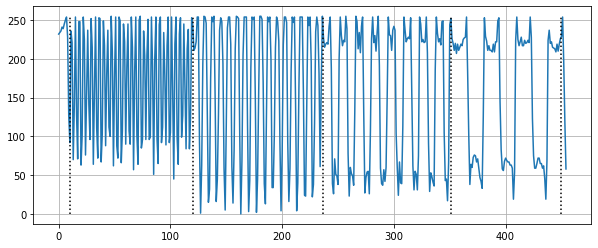

In [12]:
# Anotamos las frecuencias en los puntos donde van cambiando

bordes = [10, 120, 237, 351, 450]
         
%matplotlib inline
plt.figure(figsize=(10,4))
plt.grid()
plt.plot(y_est_r)

for b in bordes:
    plt.plot([b, b], [0, 255], ':k')

## Extraemos el MTF

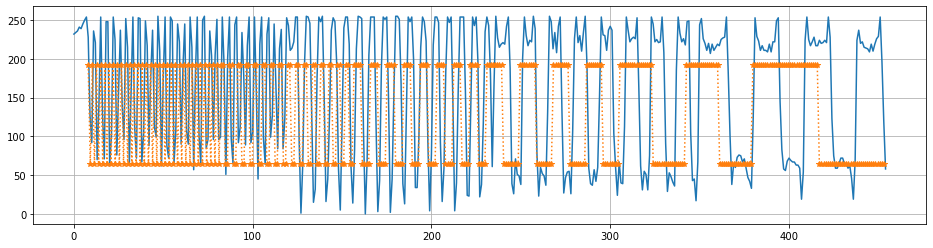

In [13]:
# Comparamos con la función que le "metimos de entrada" al sistema

%matplotlib inline
plt.figure(figsize=(16,4))
plt.grid()
plt.plot(y_est_r)

offset_l = 8
offset_r = 453

x_est=np.linspace(offset_l,offset_r,len(onda))
plt.plot(x_est, onda, ':*')

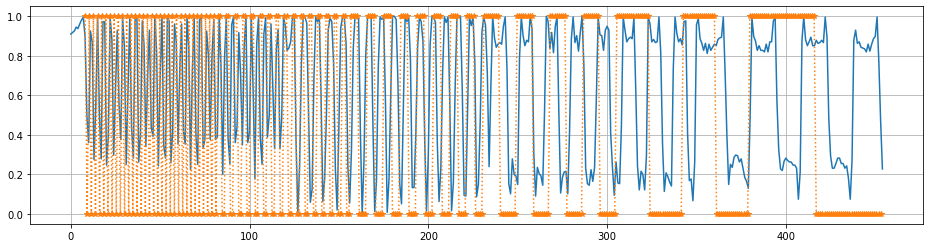

In [14]:
# Idem normalizado

%matplotlib inline
plt.figure(figsize=(16,4))
plt.grid()
plt.plot((y_est_r-np.min(y_est_r))/(np.max(y_est_r)-np.min(y_est_r)))
x_est=np.linspace(offset_l,offset_r,len(onda))
plt.plot(x_est, (onda-np.min(onda))/(np.max(onda)-np.min(onda)), ':*')

In [15]:
# Medidas al tomar la foto
distancia_monitor_mm = 500
ancho_zona_mtf_mm = 300

# Calculo del ángulo que genera la zona usada para medir mtf 
# (cateto menor en la pantalla y cateto mayor distancia entre cámara y pantalla)

angulo_zona_mtf_deg = np.arctan2(ancho_zona_mtf_mm, distancia_monitor_mm)*180/np.pi
ancho_zona_mtf_px = len(y_est_r)

In [16]:
# Calculamos grados por pixel para usar en el gráfico

deg_per_px = ancho_zona_mtf_px/angulo_zona_mtf_deg

$ \text{MTF}_{\text{Local}} = \dfrac{i_{max}-i_{min}}{i_{max}+i_{min}}$

0.33333334
0.7
1.0
0.875
0.86080587
0.6282051


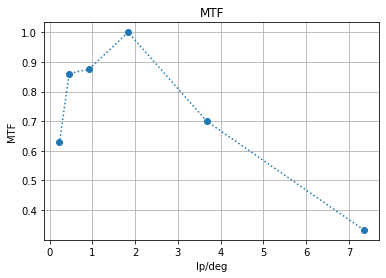

In [18]:
# Medimos el contraste en cada tramo y lo graficamos

tramos = np.split(y_est_r, bordes)

mtfs = []

for tramo in tramos:
    i_max = np.max(tramo).astype(np.float32)
    i_min = np.min(tramo).astype(np.float32)
    mtf = (i_max-i_min)/(i_max+i_min)
    mtfs.append(mtf)
    print(mtf)
    
plt.grid(); plt.title('MTF')
plt.plot(1/np.array(anchos)*deg_per_px, mtfs, ':o')
plt.ylabel('MTF');
plt.xlabel('lp/deg');

#Eje x: pares de lineas por grado
#Eje y: valor de MTF

## Conclusion

En el grafico de MTF podemos observar que luego de llegar a su maximo valor, al aumentar la frecuencia espacial, la respuesta del sistema optico va disminuyendo.

El MTF50, donde la amplitud es el 50% de la señal de entrada, nos da aproximadante 5,5 lp/deg.